### Notebook containing EDA results of the <> Dataset

In [14]:
import pandas as pd
import sys, os
import datetime
import matplotlib.pyplot as plt


In [2]:
# setup path to data
data_dir = '../data/'
data_file = pd.ExcelFile(os.path.join(data_dir,'online_retail_II.xlsx'))

In [3]:
# find all tabs in file
data_sheets = data_file.sheet_names

# read in data sheet-wise
for sheet in data_sheets:
    print sheet
df_0910 = data_file.parse(data_sheets[0])
df_1011 = data_file.parse(data_sheets[1])

# merge both years into single dataframe
df_0911 = df_0910
df_0911 = df_0911.append(df_1011)

Year 2009-2010
Year 2010-2011


In [71]:
custs = []
for i in df_0911['Customer ID'].unique():
    #print i
    try:
        custs.append(int(i))
    except:
        print "Fail"

Fail


In [4]:
print df_0911.describe()
df_1011.head()

           Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Create mungeable data cols

In [5]:
def create_date_cols(df_in):
    days, months, year = [], [], []
    ''' function to split up invoice date col '''
    for i in range(len(df_in)):
        row = df_in.iloc[i,:]
        days.append(row.InvoiceDate.day)
        months.append(row.InvoiceDate.month)
        year.append(row.InvoiceDate.year)
    return days, months, year

In [6]:
days, months, year = create_date_cols(df_1011)

''' create abstracted data df '''
df_abst = pd.DataFrame([days,months, year]).T
df_abst.columns=(['Day','Month','Year'])

### Count Purchases by Customer

In [40]:
''' generate count of purchases by customer '''
cust_purch = {}
for customer in df_0911['Customer ID'].unique():
    tmp = df_0911[df_0911['Customer ID']==customer]
    cust_purch[customer] = len(tmp)
    
df_purchCust = pd.DataFrame.from_dict(cust_purch, orient='index',columns=['Purch_Cnt'])
print "Distinct Customer IDs: {}".format(df_purchCust.shape[0])

Distinct Customer IDs: 5943


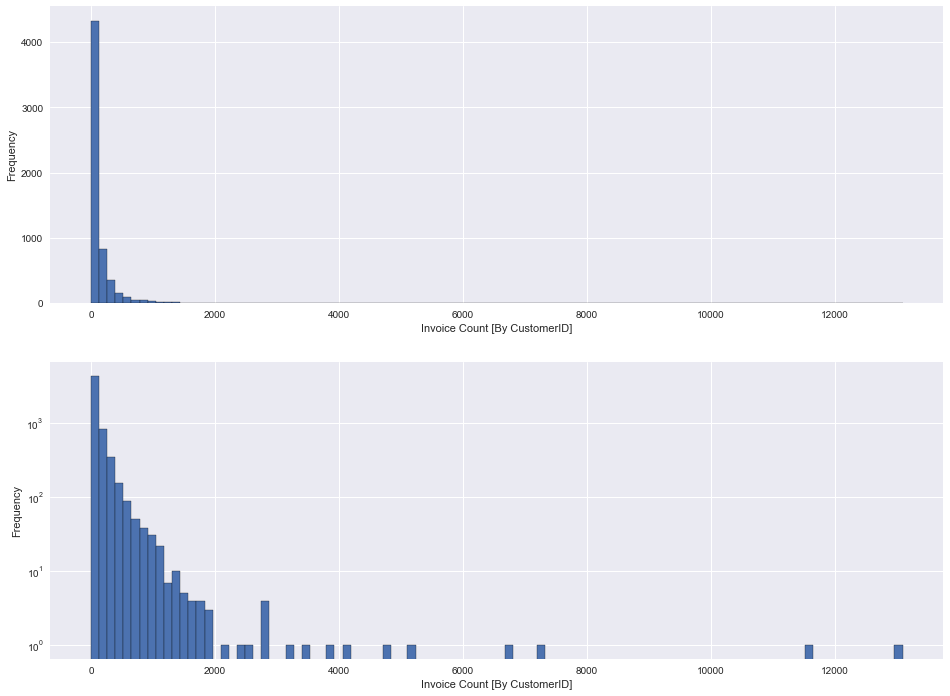

In [38]:
''' plot purchase freq '''
plt.style.use('seaborn')

fig = plt.figure(figsize=(16,6*2))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('Invoice Count [By CustomerID]')
ax1.set_ylabel('Frequency')
ax1.hist(df_purchCust.Purch_Cnt,edgecolor='black',bins=100)

ax2 = fig.add_subplot(212)
ax2.set_xlabel('Invoice Count [By CustomerID]')
ax2.set_ylabel('Frequency')
ax2.hist(df_purchCust.Purch_Cnt, bins = 100, edgecolor='black')
plt.yscale('log')

### Customer Locale by ID

In [47]:
country_cnt = {}
for country in df_0911['Country'].unique():
    tmp = df_0911[df_0911.Country == country]
    country_cnt[country] = len(tmp)
df_purchCntry = pd.DataFrame.from_dict(country_cnt, orient='index',
                                      columns=['Count'])
print "{} Distinct Countries in record.".format(len(df_purchCntry))

43 Distinct Countries in record.


In [49]:
df_purchCntry

,Count
Brazil,94
Canada,228
Italy,1534
Czech Republic,30
USA,535
Lithuania,189
Unspecified,756
France,14330
Bermuda,34
Nigeria,32


/Users/areichel/opt/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


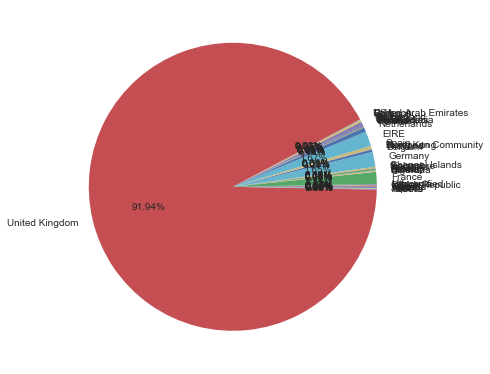

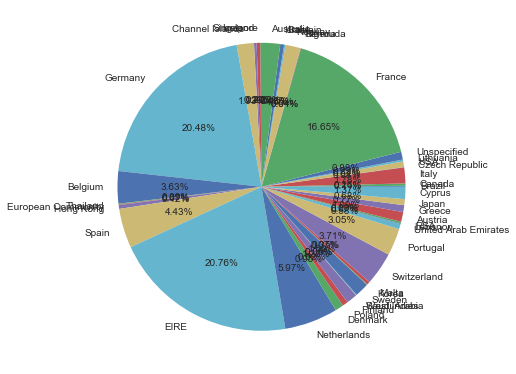

In [57]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.pie(df_purchCntry.Count, labels=df_purchCntry.index, autopct='%1.2f%%');

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
df = df_purchCntry.drop('United Kingdom', axis=0)
ax.pie(df.Count, labels=df.index, autopct='%1.2f%%');

In [60]:
cust_Country = {}
for cust in df_0911['Customer ID'].unique():
    
    cust_Country[cust] = df_0911[df_0911['Customer ID']==cust].Country


In [63]:
df_custCountry = pd.DataFrame.from_dict(cust_Country, orient='index')

KeyboardInterrupt: 

In [73]:
len(custs)

5942

In [26]:
%%capture 
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()